In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
tqdm.pandas()

In [4]:
df = pd.read_csv(r"sentiment_scores_dates.csv")

In [74]:
df['date'] = df.progress_apply(lambda row: pd.to_datetime(row['datetime']).strftime('%d/%m/%Y'), axis=1)
df['date_month'] = df.progress_apply(lambda row: pd.to_datetime(row['datetime']).strftime('%d/%m'), axis=1)

100%|██████████| 3667775/3667775 [07:14<00:00, 8446.78it/s]


In [20]:
df.to_csv('sentiment_scores_dates.csv', index=False)

### Analyzing distribution of scores

In [16]:
# invite people for the party
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_ALL, "pt_BR.utf8")
plt.rcParams.update({
    'axes.formatter.use_locale' : True,
})
plt.style.use('ggplot')

In [84]:
# https://www.fschuch.com/blog/2020/10/14/graficos-com-qualidade-de-publicacao-em-python-com-matplotlib/
# define a pattern of dimensions for plots
def get_figsize(columnwidth=4, wf=1.0, hf_rel=(5.0 ** 0.5 - 1.0) / 2.0, hf_abs=None, unit="inch"):
    # Dessa maneira, unit não será sensível a letras maiúsculas e minúsculas
    unit = unit.lower()

    # Converte unidades para polegadas, conforme esperado por Matplotlib
    conversion = dict(inch=1.0, mm=25.4, cm=2.54, pt=72.0,)

    if unit in conversion.keys():
        fig_width = columnwidth / conversion[unit]
        if hf_abs is not None:
            fig_height = hf_abs / conversion[unit]
    else:
        raise ValueError(f"unit deve ser: {conversion.keys()}")

    # A figura será apenas uma fração da largura útil da página
    fig_width *= wf

    # Caso hf_abs não seja definido, a altura será uma fração da largura
    if hf_abs is None:
        fig_height = fig_width * hf_rel

    # Retorna a largura e altura especificada para a figura
    return (fig_width, fig_height)

plt.rcParams.update({
    'figure.figsize' : get_figsize(columnwidth=455.0, unit='pt'),
    #
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# if necessary a customization for each particular figure
# fig, axes = plt.subplots(figsize=get_figsize(columnwidth=16, unit='cm', hf_rel=0.5))

### Exemplo salvando arquivo em vetorial

In [ ]:
# plt.savefig('example_line.'+f, format=f)

### Distribuição dos scores (Sem normalização)

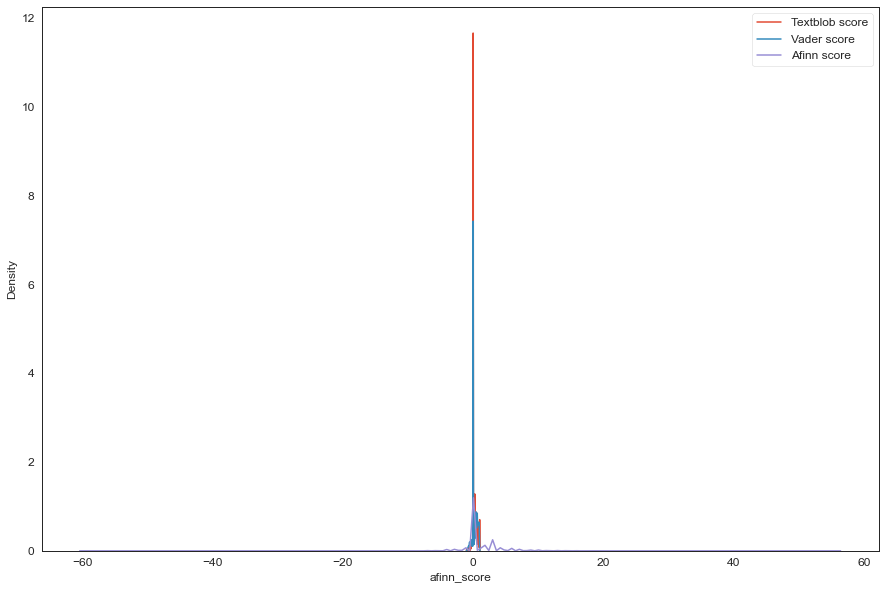

In [150]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(df["textblob_score"], ax=ax, 
                  kde=True, hist=False, label='Textblob score')
# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(df["vader_score"], ax=ax, 
                  kde=True, hist=False, label='Vader score')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df["afinn_score"], ax=ax, 
                  kde=True, hist=False, label='Afinn score')
plt.legend()
plt.savefig('1_scores_distribution.svg')
plt.savefig('1_scores_distribution.png')

### Normalização do score

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [10]:
array = np.array(df['afinn_score']).reshape(-1, 1)

In [11]:
# squares_root
def squareRoot(value):
    if value > 0:
        return np.sqrt(value)
    if value < 0:
        return np.sqrt(abs(value)) * (-1)
    return 0

squares = df.apply(lambda row: squareRoot(row['afinn_score']), axis=1)

##### Normalização

In [155]:
df_afinn_score = df['afinn_score']

In [156]:
normalizado = MinMaxScaler(feature_range=(-1,1)).fit_transform(np.array(df_afinn_score).reshape(-1,1))

##### Gráfico com normalização 1

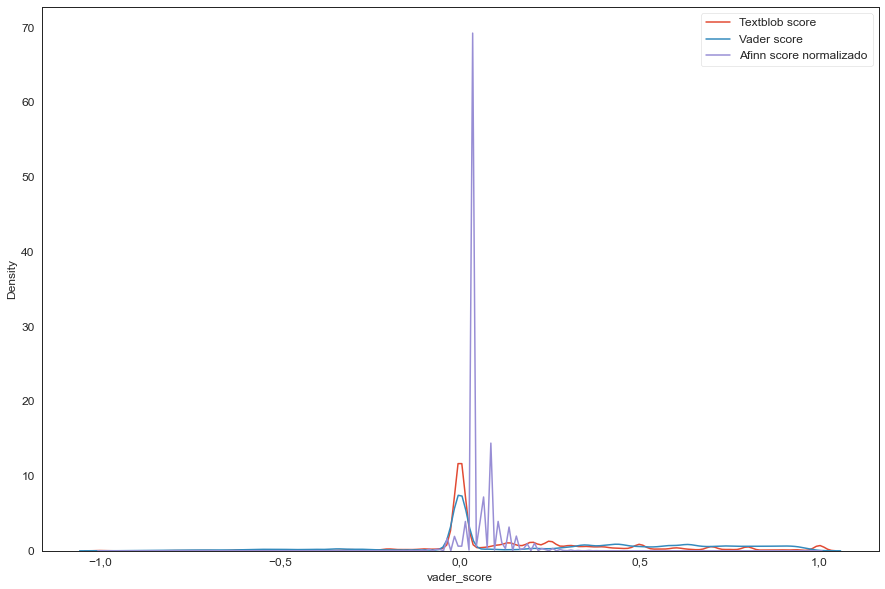

In [157]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(df["textblob_score"], ax=ax, 
                  kde=True, hist=False, label='Textblob score')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df["vader_score"], ax=ax, 
                  kde=True, hist=False, label='Vader score')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(normalizado, ax=ax, 
                  kde=True, hist=False, label='Afinn score normalizado')
plt.legend()
plt.xlabel('Polaridade')
plt.xlabel('Densidade')
plt.savefig('2_scores_distribution.svg')
plt.savefig('2_scores_distribution.png')

##### Gráfico com raiz quadrada e normalização

In [161]:
normalizadoComRaiz1 = MinMaxScaler(feature_range=(-1,1)).fit_transform(squares.values.reshape(-1,1))

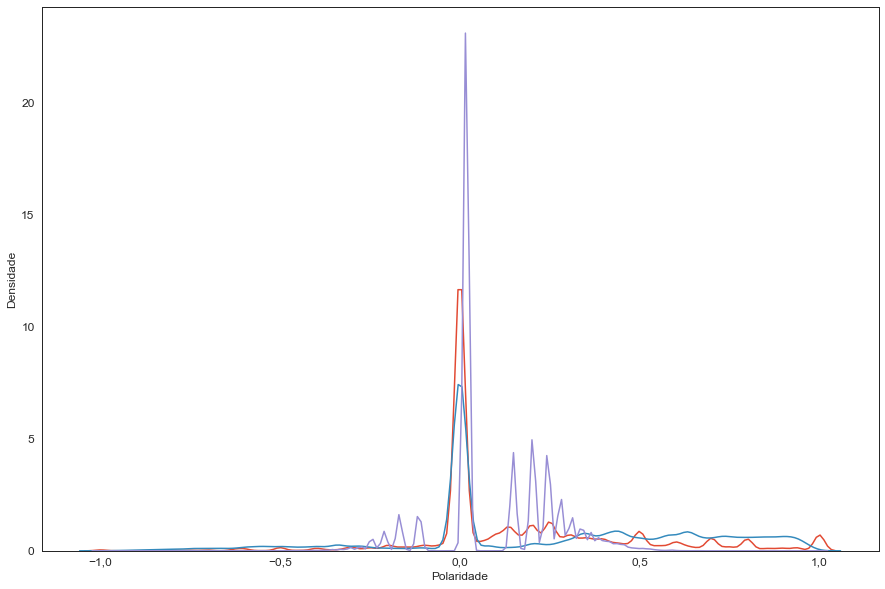

In [171]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(df["textblob_score"], ax=ax, 
                  kde=True, hist=False, label='Textblob')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df["vader_score"], ax=ax, 
                  kde=True, hist=False, label='Vader')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(normalizadoComRaiz1, ax=ax, 
                  kde=True, hist=False, label='Afinn (raíz + norm)')
plt.legend()
plt.xlabel('Polaridade')
plt.xlabel('Densidade')
plt.savefig('3_scores_distribution_raíz_e_normalização.svg')
plt.savefig('3_scores_distribution_raíz_e_normalização.png')

##### Raíz quadrada e normalização 2

In [163]:
def squareRoot(value):
    if value > 0:
        return np.sqrt(value)
    if value < 0:
        return np.sqrt(abs(value)) * (-1)
    return 0

In [12]:
squares2 = df.apply(lambda row: squareRoot(squareRoot(row['afinn_score'])), axis=1)

In [13]:
normalizadoComRaiz2 = MinMaxScaler(feature_range=(-1,1)).fit_transform(squares2.values.reshape(-1,1))

In [ ]:
squares2 = df.apply(lambda row: squareRoot(squareRoot(row['afinn_score'])), axis=1)
normalizadoComRaiz2 = MinMaxScaler(feature_range=(-1,1)).fit_transform(squares2.values.reshape(-1,1))

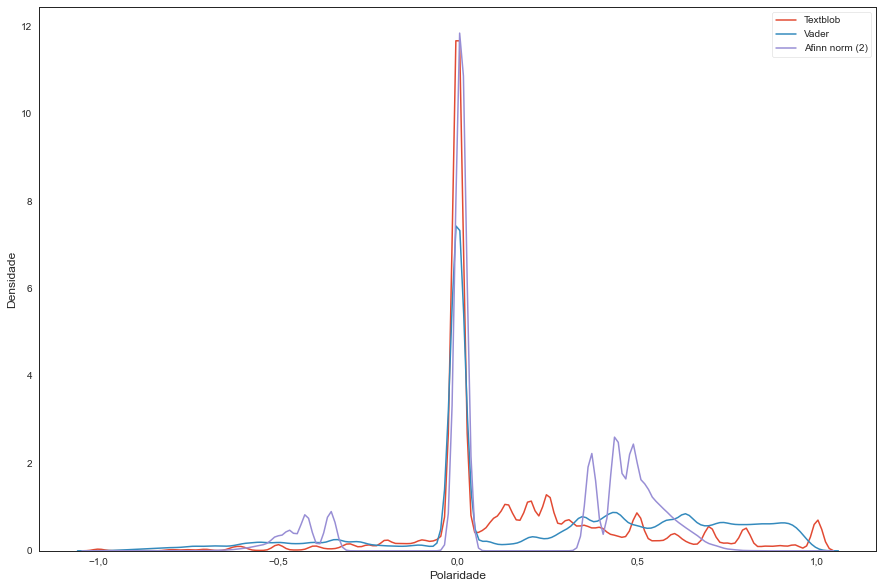

In [36]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(df["textblob_score"], ax=ax, 
                  kde=True, hist=False, label='Textblob')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df["vader_score"], ax=ax, 
                  kde=True, hist=False, label='Vader')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(normalizadoComRaiz2, ax=ax, 
                  kde=True, hist=False, label='Afinn norm (2)')
plt.legend()
plt.xlabel('Polaridade')
plt.ylabel('Densidade')
plt.savefig('4_normalização_minmax_scale.svg')
plt.savefig('4_normalização_minmax_scale.png')

In [14]:
df['afinn_score_norm'] = normalizadoComRaiz2

### Z-score normalization

In [31]:
def zscoreNormalization(x, mean, std):
    return (x-mean)/std
    

In [30]:
mean, std = np.mean(df['afinn_score']), np.std(df['afinn_score'])

In [32]:
df['afinn_zscored'] = df.apply(lambda row: zscoreNormalization(row['afinn_score'], mean, std), axis=1)

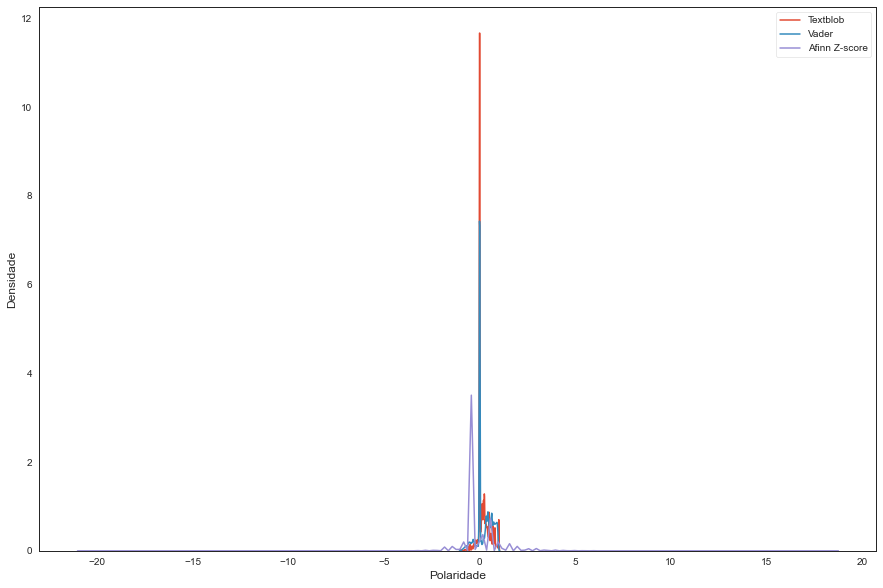

In [35]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(df["textblob_score"], ax=ax, 
                  kde=True, hist=False, label='Textblob')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df["vader_score"], ax=ax, 
                  kde=True, hist=False, label='Vader')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df['afinn_zscored'], ax=ax, 
                  kde=True, hist=False, label='Afinn Z-score')
plt.legend()
plt.xlabel('Polaridade')
plt.ylabel('Densidade')
plt.savefig('5_afinn_zscore.svg')
plt.savefig('5_afinn_zscore.png')

In [37]:
afinn_zscored = np.array(df['afinn_zscored'])

In [40]:
afinn_zscored_norm = MinMaxScaler(feature_range=(-1,1)).fit_transform(afinn_zscored.reshape(-1, 1))

In [41]:
df['afinn_zscored_norm'] = afinn_zscored_norm

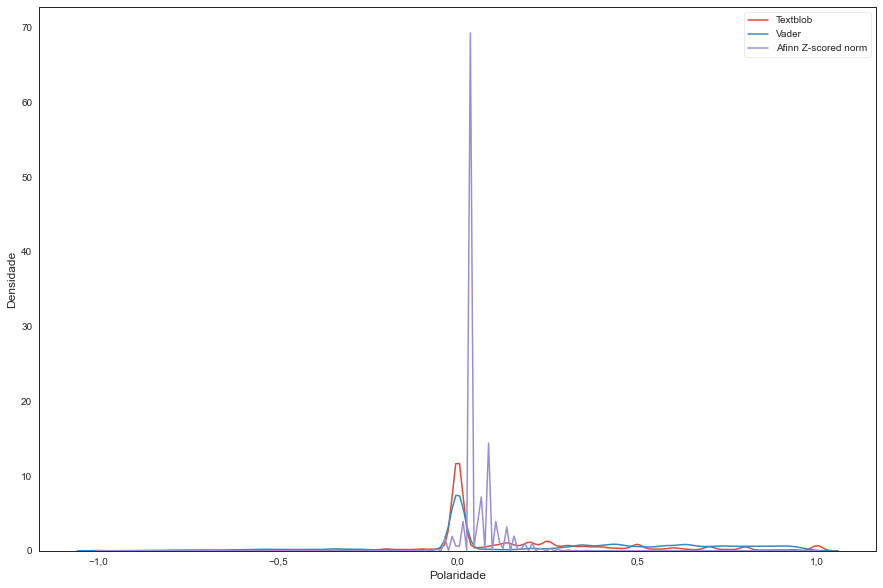

In [43]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(df["textblob_score"], ax=ax, 
                  kde=True, hist=False, label='Textblob')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df["vader_score"], ax=ax, 
                  kde=True, hist=False, label='Vader')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df['afinn_zscored_norm'], ax=ax, 
                  kde=True, hist=False, label='Afinn Z-scored norm')
plt.legend()
plt.xlabel('Polaridade')
plt.ylabel('Densidade')
plt.savefig('6_afinn_zscore_norm.svg')
plt.savefig('6_afinn_zscore_norm.png')

### Textblob normalization

In [52]:
textblob_score = df['textblob_score']
vader_score = df['vader_score']

In [53]:
textblob_norm = MinMaxScaler(feature_range=(-1,1)).fit_transform(textblob_score.values.reshape(-1,1))
vader_norm = MinMaxScaler(feature_range=(-1,1)).fit_transform(vader_score.values.reshape(-1,1))

Text(0, 0.5, 'Densidade')

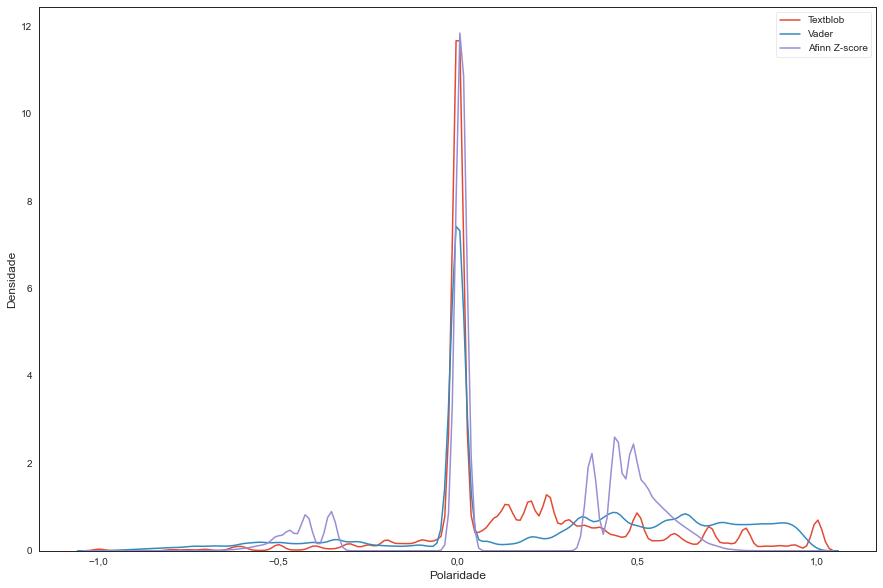

In [54]:
# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g2 = sns.distplot(textblob_norm, ax=ax, 
                  kde=True, hist=False, label='Textblob')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(vader_norm, ax=ax, 
                  kde=True, hist=False, label='Vader')
# Insere curva KDE (Kernel Density Estimation)
g3 = sns.distplot(df['afinn_score_norm'], ax=ax, 
                  kde=True, hist=False, label='Afinn Z-score')
plt.legend()
plt.xlabel('Polaridade')
plt.ylabel('Densidade')

### Textblob

In [50]:
from textblob import TextBlob

In [51]:
# determine the sentiment
def getScore(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [52]:
from tqdm import tqdm
tqdm.pandas()

In [53]:
#Create two new columns ‘Subjectivity’ & ‘Polarity’
df['textBlob_subjectivity'] = df.progress_apply(lambda row: getSubjectivity(row['processed_text']), axis=1)
df['textBlob_polarity'] = df.progress_apply(lambda row: getPolarity(row['processed_text']), axis=1)    
df['textBlob_analysis'] = df.progress_apply(lambda row: getAnalysis(row['textBlob_polarity']), axis=1)

df.to_csv('processed_text_withemojis_tb.csv', index=False)

100%|██████████| 3667775/3667775 [00:35<00:00, 104710.60it/s]


### Vader

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#checks if value is string
def checkIfValueIsString(test_string):
    return isinstance(test_string, str)

# create a function to get the subjectivity
def getScores(text):
    if (checkIfValueIsString(text) == True):
        return analyzer.polarity_scores(text)
    else:
        return 0

#Create two new columns ‘Subjectivity’ & ‘Polarity’
df['vader_scores'] = df.progress_apply(lambda row: getScores(row['processed_text']), axis=1)

df.to_csv('processed_text_withemojis_tb_vd.csv', index=False)

In [71]:
df['vader_neg'] = df.progress_apply(lambda row: row['vader_scores']['neg'], axis=1)
df['vader_neu'] = df.progress_apply(lambda row: row['vader_scores']['neu'], axis=1)
df['vader_pos'] = df.progress_apply(lambda row: row['vader_scores']['pos'], axis=1)
df['vader_compound'] = df.progress_apply(lambda row: row['vader_scores']['compound'], axis=1)

100%|██████████| 3667775/3667775 [00:37<00:00, 98459.80it/s] 


In [72]:
df.head()

,datetime,tweet_id,text,processed_text,textBlob_subjectivity,textBlob_polarity,textBlob_analysis,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨Join me this Sunday to celebrate 6 months sin...,✨ join thil sunday celebrat 6 month sinc genes...,0.65,0.4375,Positive,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.0,0.738,0.262,0.8852
1,2021-10-01 00:13:00+00:00,1443730633360953344,@top7ico @MXCfoundation @DeFinePlatform @YOPfi...,@top7 @mxcfoundation @defineplatform @yopf @o3...,0.30,1.0000,Positive,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.0,0.798,0.202,0.7249
2,2021-10-01 00:13:09+00:00,1443730669419446291,@MetaSpatial_io Good project go to the moon 🚀🚀...,@metaspatial_i good project go moon 🚀 🚀 🚀 @muh...,0.60,0.7000,Positive,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.0,0.838,0.162,0.4404
3,2021-10-01 00:13:18+00:00,1443730706409033728,@Metaverse_Yin I just take the hype as alpha lol,@metaverse_yin tak hyp alph lol,0.70,0.8000,Positive,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.0,0.588,0.412,0.4215
4,2021-10-01 00:13:56+00:00,1443730867797565442,@Metaverse_Yin Keep it coming ! Lmao,@metaverse_yin keep coming ! lma,0.00,0.0000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000


In [74]:
df = df[['datetime', 'tweet_id', 'text', 'processed_text',
       'textBlob_subjectivity', 'textBlob_polarity', 
       'textBlob_analysis','vader_compound']]

In [75]:
df.head()

,datetime,tweet_id,text,processed_text,textBlob_subjectivity,textBlob_polarity,textBlob_analysis,vader_compound
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨Join me this Sunday to celebrate 6 months sin...,✨ join thil sunday celebrat 6 month sinc genes...,0.65,0.4375,Positive,0.8852
1,2021-10-01 00:13:00+00:00,1443730633360953344,@top7ico @MXCfoundation @DeFinePlatform @YOPfi...,@top7 @mxcfoundation @defineplatform @yopf @o3...,0.30,1.0000,Positive,0.7249
2,2021-10-01 00:13:09+00:00,1443730669419446291,@MetaSpatial_io Good project go to the moon 🚀🚀...,@metaspatial_i good project go moon 🚀 🚀 🚀 @muh...,0.60,0.7000,Positive,0.4404
3,2021-10-01 00:13:18+00:00,1443730706409033728,@Metaverse_Yin I just take the hype as alpha lol,@metaverse_yin tak hyp alph lol,0.70,0.8000,Positive,0.4215
4,2021-10-01 00:13:56+00:00,1443730867797565442,@Metaverse_Yin Keep it coming ! Lmao,@metaverse_yin keep coming ! lma,0.00,0.0000,Neutral,0.0000


In [76]:
df.to_csv('processed_text_withemojis_tb_vd.csv', index=False)

### Afinn

In [78]:
#importing necessary libraries
from afinn import Afinn
#instantiate afinn
afn = Afinn()

#checks if value is string
def checkIfValueIsString(test_string):
    return isinstance(test_string, str)

# create a function to get the subjectivity
def getAfinnScores(text):
    if (checkIfValueIsString(text) == True):
        return afn.score(text)
    else:
        return 0

df['afinn_score'] = df.progress_apply(lambda row: getAfinnScores(row['processed_text']), axis=1)

In [81]:
df.head()

,datetime,tweet_id,text,processed_text,textBlob_subjectivity,textBlob_polarity,textBlob_analysis,vader_compound,afinn_score
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨Join me this Sunday to celebrate 6 months sin...,✨ join thil sunday celebrat 6 month sinc genes...,0.65,0.4375,Positive,0.8852,3.0
1,2021-10-01 00:13:00+00:00,1443730633360953344,@top7ico @MXCfoundation @DeFinePlatform @YOPfi...,@top7 @mxcfoundation @defineplatform @yopf @o3...,0.30,1.0000,Positive,0.7249,3.0
2,2021-10-01 00:13:09+00:00,1443730669419446291,@MetaSpatial_io Good project go to the moon 🚀🚀...,@metaspatial_i good project go moon 🚀 🚀 🚀 @muh...,0.60,0.7000,Positive,0.4404,3.0
3,2021-10-01 00:13:18+00:00,1443730706409033728,@Metaverse_Yin I just take the hype as alpha lol,@metaverse_yin tak hyp alph lol,0.70,0.8000,Positive,0.4215,3.0
4,2021-10-01 00:13:56+00:00,1443730867797565442,@Metaverse_Yin Keep it coming ! Lmao,@metaverse_yin keep coming ! lma,0.00,0.0000,Neutral,0.0000,0.0


In [88]:
df.to_csv('processed_text_withemojis_tb_vd_af.csv', index=False)

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [191]:
df.columns

Index(['datetime', 'tweet_id', 'text', 'text_lower', 'processed_text',
       'textBlob_subjectivity', 'textBlob_polarity', 'textBlob_analysis',
       'vader_compound', 'afinn_score'],
      dtype='object')

In [192]:
frame = df[['datetime', 'tweet_id', 'text', 'text_lower', 'processed_text', 'textBlob_polarity', 'textBlob_analysis',
       'vader_compound', 'afinn_score']]

In [195]:
frame.to_csv('processed_text_withemojis_scores.csv', index=False)

### Delimitando tweets que realmente falam sobre o metaverso

<blockquote>A força do tweet é determinada pela presença na pesquisa pelos usuários do Google Trends</blockquote>

Singular

- metaverse is (139237)
- what metaverse (2932)
- is metaverse (31952)
- what is metaverse (1794)
- what metaverse is (884)

Plural

- metaverses are (604)
- what metaverses (26)
- are metaverses (58)
- what are metaverses (0)
- what metaverses are (9)

<blockquote>Textos que fazem parte das pesquisas feitas por usuários são considerados fortes. Os tweets que contém os termos irão compor os tópicos fortemente relacionados</blockquote>

In [170]:
relatedTopics = 'metaverse is|what metaverse|is metaverse|what is metaverse|what metaverse is|metaverses are|what metaverses|are metaverses|what metaverses are'

In [176]:
df.groupby('textBlob_analysis')['text'].count()

textBlob_analysis
Negative     301550
Neutral     1656337
Positive    1709888
Name: text, dtype: int64

### Tweets fracamente relacionados

In [187]:
df[~df['text_lower'].str.contains(relatedTopics, regex=True)].set_index('datetime').groupby('textBlob_analysis')['text'].resample('M').count()

textBlob_analysis  datetime                 
Negative           2021-10-31 00:00:00+00:00     24916
                   2021-11-30 00:00:00+00:00     46056
                   2021-12-31 00:00:00+00:00     43131
                   2022-01-31 00:00:00+00:00     48959
                   2022-02-28 00:00:00+00:00     42377
                   2022-03-31 00:00:00+00:00     37829
                   2022-04-30 00:00:00+00:00     34834
Neutral            2021-10-31 00:00:00+00:00    127894
                   2021-11-30 00:00:00+00:00    275846
                   2021-12-31 00:00:00+00:00    244851
                   2022-01-31 00:00:00+00:00    267519
                   2022-02-28 00:00:00+00:00    227776
                   2022-03-31 00:00:00+00:00    213656
                   2022-04-30 00:00:00+00:00    227912
Positive           2021-10-31 00:00:00+00:00    135728
                   2021-11-30 00:00:00+00:00    314800
                   2021-12-31 00:00:00+00:00    268311
                   2

### Tweets fortemente relacionados

In [189]:
df[df['text_lower'].str.contains(relatedTopics, regex=True)].set_index('datetime').groupby('textBlob_analysis')['text'].resample('M').count()

textBlob_analysis  datetime                 
Negative           2021-10-31 00:00:00+00:00     2753
                   2021-11-30 00:00:00+00:00     4075
                   2021-12-31 00:00:00+00:00     3615
                   2022-01-31 00:00:00+00:00     5022
                   2022-02-28 00:00:00+00:00     3802
                   2022-03-31 00:00:00+00:00     2154
                   2022-04-30 00:00:00+00:00     2027
Neutral            2021-10-31 00:00:00+00:00     7897
                   2021-11-30 00:00:00+00:00    14473
                   2021-12-31 00:00:00+00:00    11640
                   2022-01-31 00:00:00+00:00    12956
                   2022-02-28 00:00:00+00:00     9734
                   2022-03-31 00:00:00+00:00     7614
                   2022-04-30 00:00:00+00:00     6569
Positive           2021-10-31 00:00:00+00:00     7959
                   2021-11-30 00:00:00+00:00    15088
                   2021-12-31 00:00:00+00:00    12498
                   2022-01-31 00:00:0

<blockquote>Como pode-se ver na tabela, para comentários fortemente relacionados ao metaverso, o número de comentários positivos supera o número de comentários negativos</blockquote>

In [197]:
# TODO: fazer merge com pd.apply e verificar de qual usuário cada base de dados pertence

In [203]:
columns=['datetime','tweet_id','username','like_count','username','user_followers','user_fav_count','is_verified','created_at']

In [204]:
tweets_users = pd.read_csv(r'C:\Users\wferreira.MPAC\OneDrive\TCC II - Metaverso\workspace\twitter-EDA\tweets_preprocessing_norm\tweets_preprocessed_english.csv', usecols=columns)

### Merging values of two columns

In [226]:
sentiment = df[['tweet_id','textBlob_analysis']]

In [231]:
text_lower = df[['tweet_id','text_lower']]

##### Inner join

In [232]:
merged_inner = pd.merge(left=merged_inner, right=text_lower, left_on='tweet_id', right_on='tweet_id')

In [1]:
import pandas as pd

#### Salvando sentimentos

In [2]:
df = pd.read_csv('sentiment_scores.csv')

In [9]:
df.columns

Index(['datetime', 'tweet_id', 'processed_text', 'text_lower',
       'textblob_sentiment', 'vader_sentiment', 'afinn_sentiment',
       'textblob_score', 'vader_score', 'afinn_score'],
      dtype='object')

In [28]:
only_sentiments = df[['processed_text','textblob_sentiment', 'vader_sentiment', 'afinn_sentiment','textblob_score', 'vader_score', 'afinn_score']]

In [6]:
import dataframe_image as dfi

In [18]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", 30)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

In [29]:
only_sentiments.columns = ['processed_text',
       'textblob',
       'vader',
       'afinn',
       't_score',
       'v_score',
       'a_score']

In [ ]:
dfi.export(
    only_sentiments.head(20),
    "table_sentiment_and_score_.png",
    table_conversion="matplotlib"
)

#### Salvando normalização

In [31]:
strength = pd.read_csv(r'C:\Users\wferreira.MPAC\OneDrive\TCC II - Metaverso\workspace\twitter-EDA\tweets_studies_ranking\strength.csv')

In [34]:
strength.columns

Index(['datetime',
       'date',
       'date_month',
       'tweet_id',
       'processed_text',
       'text_lower',
       'textblob_sentiment',
       'vader_sentiment',
       'afinn_sentiment',
       'textblob_score',
       'vader_score',
       'afinn_score',
       'afinn_score_norm',
       'strength'],
      dtype='object')

In [35]:
only_norm = strength[[
       'processed_text',
       'textblob_sentiment',
       'vader_sentiment',
       'afinn_sentiment',
       'textblob_score',
       'vader_score',
       'afinn_score',
       'afinn_score_norm']]

In [38]:
only_norm.columns = ['processed_text',
       'textblob',
       'vader',
       'afinn',
       't_score',
       'v_score',
       'a_score',
       'a_norm_score']

In [39]:
dfi.export(
    only_norm.head(20),
    "table_afinn_norm.png",
    table_conversion="matplotlib"
)

c:\Users\wferreira.MPAC\AppData\Local\Programs\Python\Python310\lib\site-packages\dataframe_image\_matplotlib_table.py:115: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  bbox = t.get_window_extent(renderer=self.renderer)
c:\Users\wferreira.MPAC\AppData\Local\Programs\Python\Python310\lib\site-packages\dataframe_image\_matplotlib_table.py:115: UserWarning: Glyph 128276 (\N{BELL}) missing from current font.
  bbox = t.get_window_extent(renderer=self.renderer)
c:\Users\wferreira.MPAC\AppData\Local\Programs\Python\Python310\lib\site-packages\dataframe_image\_matplotlib_table.py:115: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from current font.
  bbox = t.get_window_extent(renderer=self.renderer)
c:\Users\wferreira.MPAC\AppData\Local\Programs\Python\Python310\lib\site-packages\dataframe_image\_matplotlib_table.py:237: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  self.fig.savefig(buffer, bbox_inches=bbox)
c:\Users\wferreira

In [40]:
df.head()

,datetime,tweet_id,processed_text,text_lower,textblob_sentiment,vader_sentiment,afinn_sentiment,textblob_score,vader_score,afinn_score
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨ join thil sunday celebra...,✨join me this sunday to ce...,Positive,Positive,Positive,0.4375,0.8852,3.0
1,2021-10-01 00:13:00+00:00,1443730633360953344,@top7 @mxcfoundation @defi...,@top7ico @mxcfoundation @d...,Positive,Positive,Positive,1.0000,0.7249,3.0
2,2021-10-01 00:13:09+00:00,1443730669419446291,@metaspatial_i good projec...,@metaspatial_io good proje...,Positive,Positive,Positive,0.7000,0.4404,3.0
3,2021-10-01 00:13:18+00:00,1443730706409033728,@metaverse_yin tak hyp alp...,@metaverse_yin i just take...,Positive,Positive,Positive,0.8000,0.4215,3.0
4,2021-10-01 00:13:56+00:00,1443730867797565442,@metaverse_yin keep coming...,@metaverse_yin keep it com...,Neutral,Neutral,Neutral,0.0000,0.0000,0.0
